### Projet Machine Learning

<center><img src='https://netacad.centralesupelec.fr/img/cs.jpg' width=200></center>

<h1>
<hr style=" border:none; height:3px;">
<center>Projet Machine Learning - Potabilité de l'eau</center>
<hr style=" border:none; height:3px;">
</h1>

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import os

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Numpy arrays are used to store training and test data.
import numpy as np

# Pandas is used to manipulate tabular data.
import pandas as pd

# Matplotlib is used to plot graphs.
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998).
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Convenience function to create display a progress bar.
# Source : https://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console
def print_progress_bar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()
 
# Saves a figure to a file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("./figs", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Drinking Water Potability Dataset


In [3]:
PATH = "data/"
csv_path = os.path.join(PATH, "drinking_water_potability.csv")
drinking_water_potability = pd.read_csv(csv_path)

In [4]:
drinking_water_potability.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
drinking_water_potability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
drinking_water_potability.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


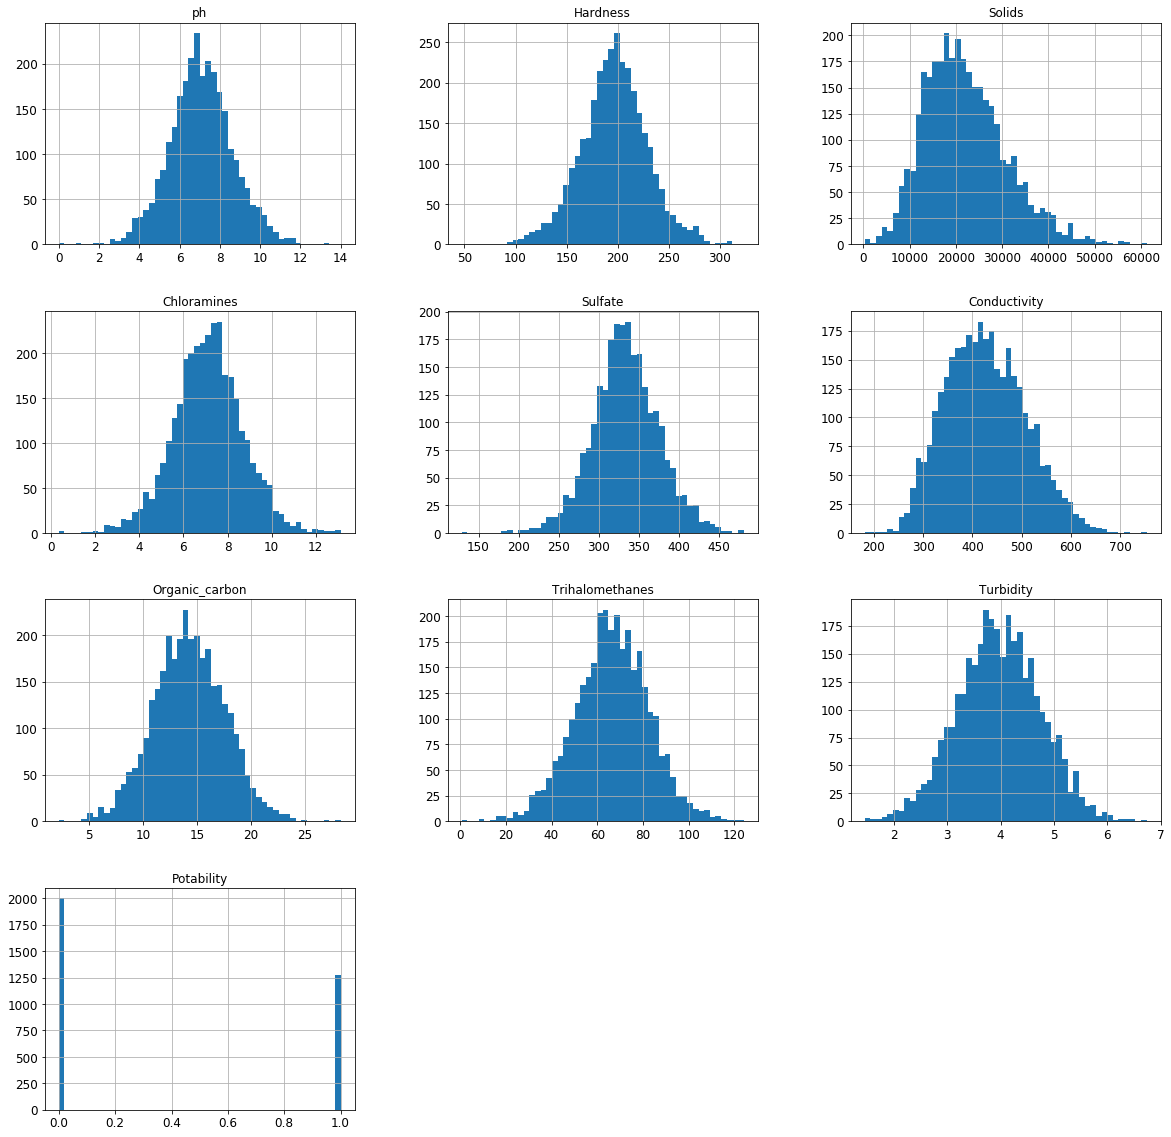

In [7]:
drinking_water_potability.hist(bins = 50, figsize = (20,20))
plt.show()

Data Cleaning

In [8]:
drinking_water_potability["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [9]:
#Checking missing values
missing_df = drinking_water_potability.isna()
missing_df = np.round(100 * missing_df.sum()/len(drinking_water_potability), 2)
missing_df

ph                 14.99
Hardness            0.00
Solids              0.00
Chloramines         0.00
Sulfate            23.84
Conductivity        0.00
Organic_carbon      0.00
Trihalomethanes     4.95
Turbidity           0.00
Potability          0.00
dtype: float64

In [10]:
#Santard Scaling


df_scaled = drinking_water_potability.drop(columns = ['Potability'], axis = 1).copy()
for col in df_scaled.columns :
  mean = df_scaled[col].mean()
  std = df_scaled[col].std()
  df_scaled[col] = df_scaled[col].apply(lambda x : (x-mean)/std)
df_scaled['Potability'] = drinking_water_potability['Potability']

df_scaled.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2.785000e+03,3.276000e+03,3.276000e+03,3.276000e+03,2.495000e+03,3.276000e+03,3.276000e+03,3.114000e+03,3.276000e+03,3276.000000
mean,1.060709e-14,5.015194e-16,2.483870e-15,-2.055497e-15,-1.773246e-14,-6.164788e-15,1.521134e-15,1.380613e-15,-4.304927e-15,0.390110
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.487849
min,-4.441264e+00,-4.529762e+00,-2.473966e+00,-4.276635e+00,-4.944264e+00,-3.027828e+00,-3.653077e+00,-4.059243e+00,-3.225068e+00,0.000000
25%,-6.195136e-01,-5.936466e-01,-7.238810e-01,-6.284287e-01,-6.296057e-01,-7.481769e-01,-6.708163e-01,-6.523494e-01,-6.754064e-01,0.000000
50%,-2.762458e-02,1.819146e-02,-1.238810e-01,5.067436e-03,-1.695520e-02,-5.345119e-02,-2.014179e-02,1.398405e-02,-1.506775e-02,0.000000
75%,6.154799e-01,6.173390e-01,6.065606e-01,6.270101e-01,6.319747e-01,6.877555e-01,6.869921e-01,6.764250e-01,6.836823e-01,1.000000
max,4.339911e+00,3.855092e+00,4.472006e+00,3.793052e+00,3.555435e+00,4.047526e+00,4.236500e+00,3.561278e+00,3.552379e+00,1.000000


# Feature selection

In [11]:
df_test1 = df_scaled.drop(columns = ['ph', 'Sulfate', 'Trihalomethanes'], axis = 1)
df_test1.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,0.259155,-0.139450,0.112398,1.708693,-1.180470,-1.286101,0
1,-2.036103,-0.385928,-0.307647,2.062260,0.270556,0.684113,0
2,0.847535,-0.240011,1.360386,-0.094018,0.780998,-1.167187,0
3,0.547568,0.000493,0.591917,-0.778711,1.254943,0.848282,0
4,-0.464358,-0.460178,-0.363642,-0.343886,-0.824231,0.138764,0


In [12]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, plot_confusion_matrix

## TEST 1 : Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_test1.drop(columns = ['Potability'], axis = 1)
y = df_test1['Potability'].apply(lambda x:str(x))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = LogisticRegression().fit(X_train, y_train)
score = clf.score(X_test, y_test)

y_pred_lr = clf.predict(X_test)

The accuracy score achieved using Logistic Regression is: 56.86 %
Macro precision : 50.00 %
The precision score achieved using Logistic Regression is: nan %
The recall score achieved using Logistic Regression is: 0.0 %


<ipython-input-14-841e4c805068>:6: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_lr = 100 * tp / (tp + fp)


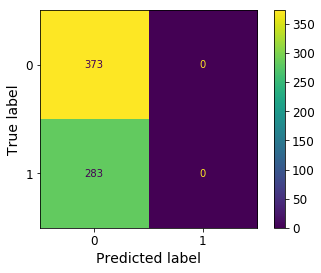

In [14]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

print("Macro precision : {:.2f} %".format(100 * precision_score(y_pred_lr,y_test, average='macro')))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_lr).ravel()
precision_lr = 100 * tp / (tp + fp)
recall_lr = 100 * tp / (tp + fn)
print("The precision score achieved using Logistic Regression is: "+str(round(precision_lr,2))+" %")
print("The recall score achieved using Logistic Regression is: "+str(round(recall_lr,2))+" %")

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

## Test 2 : Decision Tree

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df_test1.drop(columns = ['Potability'], axis = 1)
y = df_test1['Potability'].apply(lambda x:str(x))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier().fit(X_train, y_train)
score = clf.score(X_test, y_test)

y_pred_DT = clf.predict(X_test)

The accuracy score achieved using Decision Tree is: 53.05 %
Macro precision : 51.68 %
The precision score achieved using Decision Tree is: 45.21 %
The recall score achieved using Decision Tree is: 41.7 %


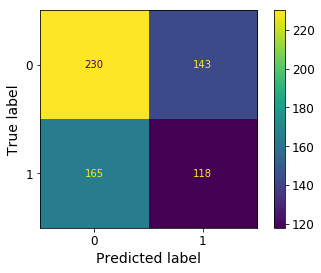

In [16]:
score_DT = round(accuracy_score(y_pred_DT,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_DT)+" %")

print("Macro precision : {:.2f} %".format(100 * precision_score(y_pred_DT,y_test, average='macro')))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
precision_DT = 100 * tp / (tp + fp)
recall_DT = 100 * tp / (tp + fn)
print("The precision score achieved using Decision Tree is: "+str(round(precision_DT,2))+" %")
print("The recall score achieved using Decision Tree is: "+str(round(recall_DT,2))+" %")

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

# Data Imputation

In [17]:
#Data Imputation

df_mean_impute = df_scaled.copy()

def impute(x, mean):
  if str(x) == str(np.nan):
    return mean
  else :
    return x

for col in df_mean_impute.columns :
  mean = df_mean_impute[col].mean()
  df_mean_impute[col] = df_mean_impute[col].apply(lambda x : impute(x, mean))

df_mean_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Test 3 Logistic Regression and Descion Tree with mean imputation

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_mean_impute.drop(columns = ['Potability'], axis = 1)
y = df_mean_impute['Potability'].apply(lambda x:str(x))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = LogisticRegression().fit(X_train, y_train)
score = clf.score(X_test, y_test)

y_pred_lr = clf.predict(X_test)

The accuracy score achieved using Logistic Regression is: 57.01 %
Macro precision : 50.18 %
The precision score achieved using Logistic Regression is: 100.0 %
The recall score achieved using Logistic Regression is: 0.35 %


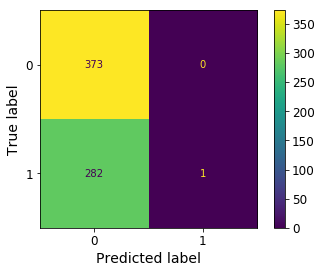

In [19]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

print("Macro precision : {:.2f} %".format(100 * precision_score(y_pred_lr,y_test, average='macro')))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_lr).ravel()
precision_lr = 100 * tp / (tp + fp)
recall_lr = 100 * tp / (tp + fn)
print("The precision score achieved using Logistic Regression is: "+str(round(precision_lr,2))+" %")
print("The recall score achieved using Logistic Regression is: "+str(round(recall_lr,2))+" %")

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df_mean_impute.drop(columns = ['Potability'], axis = 1)
y = df_mean_impute['Potability'].apply(lambda x:str(x))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier().fit(X_train, y_train)
score = clf.score(X_test, y_test)

y_pred_DT = clf.predict(X_test)

The accuracy score achieved using Decision Tree is: 59.3 %
Macro precision : 57.99 %
The precision score achieved using Decision Tree is: 53.1 %
The recall score achieved using Decision Tree is: 48.41 %


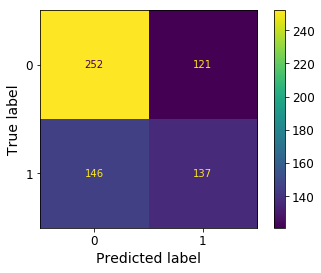

In [21]:
score_DT = round(accuracy_score(y_pred_DT,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_DT)+" %")

print("Macro precision : {:.2f} %".format(100 * precision_score(y_pred_DT,y_test, average='macro')))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
precision_DT = 100 * tp / (tp + fp)
recall_DT = 100 * tp / (tp + fn)
print("The precision score achieved using Decision Tree is: "+str(round(precision_DT,2))+" %")
print("The recall score achieved using Decision Tree is: "+str(round(recall_DT,2))+" %")

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

## Test 4 : Random Forest + Stratify

In [22]:
from sklearn.ensemble import RandomForestClassifier

X = df_mean_impute.drop(columns = ['Potability'], axis = 1)
y = df_mean_impute['Potability'].apply(lambda x:str(x))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

clf = RandomForestClassifier().fit(X_train, y_train)
score = clf.score(X_test, y_test)

y_pred_RF = clf.predict(X_test)

The accuracy score achieved using Random Forest is: 66.92 %
Macro precision : 61.34 %
The precision score achieved using Random Forest is: 63.45 %
The recall score achieved using Random Forest is: 35.94 %


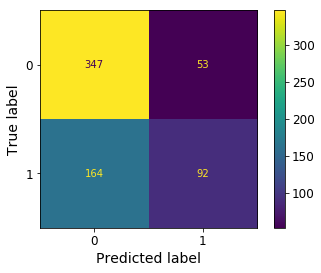

In [23]:
score_RF = round(accuracy_score(y_pred_RF,y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_RF)+" %")

print("Macro precision : {:.2f} %".format(100 * precision_score(y_pred_RF,y_test, average='macro')))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_RF).ravel()
precision_RF = 100 * tp / (tp + fp)
recall_RF = 100 * tp / (tp + fn)
print("The precision score achieved using Random Forest is: "+str(round(precision_RF,2))+" %")
print("The recall score achieved using Random Forest is: "+str(round(recall_RF,2))+" %")

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

## Test 5 : SVM

In [24]:
from sklearn.svm import SVC

X = df_mean_impute.drop(columns = ['Potability'], axis = 1)
y = df_mean_impute['Potability'].apply(lambda x:str(x))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

clf = SVC().fit(X_train, y_train)
score = clf.score(X_test, y_test)

y_pred_SVM = clf.predict(X_test)

The accuracy score achieved using SVM is: 68.75 %
Macro precision : 61.37 %
380 20 185 71
The precision score achieved using SVM is: 78.02 %
The recall score achieved using SVM is: 27.73 %


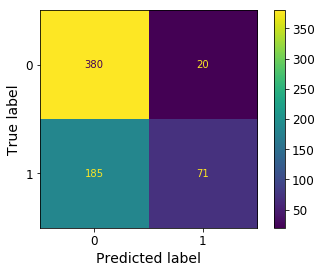

In [25]:
score_SVM = round(accuracy_score(y_pred_SVM,y_test)*100,2)
print("The accuracy score achieved using SVM is: "+str(score_SVM)+" %")

print("Macro precision : {:.2f} %".format(100 * precision_score(y_pred_SVM,y_test, average='macro')))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_SVM).ravel()
print(tn, fp, fn, tp)
precision_SVM = 100 * tp / (tp + fp)
recall_SVM = 100 * tp / (tp + fn)
print("The precision score achieved using SVM is: "+str(round(precision_SVM, 2))+" %")
print("The recall score achieved using SVM is: "+str(round(recall_SVM,2))+" %")

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

## Test 6 : Voting classifier : SVM + RF + LR

In [26]:
from sklearn.ensemble import VotingClassifier

X = df_mean_impute.drop(columns = ['Potability'], axis = 1)
y = df_mean_impute['Potability'].apply(lambda x:str(x))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = SVC(probability=True)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='soft')

eclf = eclf.fit(X_train, y_train)
score = eclf.score(X_test, y_test)

y_pred_VC = eclf.predict(X_test)

The accuracy score achieved using voting classifier is: 69.36 %
Macro precision : 62.08 %
381 19 182 74
The precision score achieved using voting classifier is: 79.57 %
The recall score achieved using voting classifier is: 28.91 %


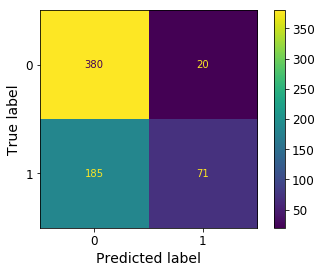

In [27]:
score_VC = round(accuracy_score(y_pred_VC,y_test)*100,2)
print("The accuracy score achieved using voting classifier is: "+str(score_VC)+" %")

print("Macro precision : {:.2f} %".format(100 * precision_score(y_pred_VC,y_test, average='macro')))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_VC).ravel()
print(tn, fp, fn, tp)
precision_VC = 100 * tp / (tp + fp)
recall_VC = 100 * tp / (tp + fn)
print("The precision score achieved using voting classifier is: "+str(round(precision_VC, 2))+" %")
print("The recall score achieved using voting classifier is: "+str(round(recall_VC,2))+" %")

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

# Neural Network

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [41]:
X = df_mean_impute.drop(columns = ['Potability'], axis = 1)
y = df_mean_impute['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

In [42]:
print(X_train.shape)
print(y_train.shape)

(2620, 9)
(2620,)


In [43]:
input_dimension = X_train.shape[1]

model = Sequential()
model.add(Dense(10,activation='relu',input_dim=input_dimension))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=300)

Y_pred_nn = model.predict(X_test)


Epoch 1/300
82/82 [==============================] - 2s 2ms/step - loss: 0.7268 - accuracy: 0.5160
Epoch 2/300
82/82 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5712
Epoch 3/300
82/82 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.5980
Epoch 4/300
82/82 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6078
Epoch 5/300
82/82 [==============================] - 0s 1ms/step - loss: 0.6474 - accuracy: 0.6366
Epoch 6/300
82/82 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.6246
Epoch 7/300
82/82 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.6332
Epoch 8/300
82/82 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.6431
Epoch 9/300
82/82 [==============================] - 0s 1000us/step - loss: 0.6364 - accuracy: 0.6408
Epoch 10/300
82/82 [==============================] - 0s 975us/step - loss: 0.6333 - accuracy: 0.6454
Epoc

82/82 [==============================] - 0s 1ms/step - loss: 0.5721 - accuracy: 0.6913
Epoch 82/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5732 - accuracy: 0.6942
Epoch 83/300
82/82 [==============================] - 0s 988us/step - loss: 0.5808 - accuracy: 0.7002
Epoch 84/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5824 - accuracy: 0.6873
Epoch 85/300
82/82 [==============================] - 0s 938us/step - loss: 0.5959 - accuracy: 0.6724
Epoch 86/300
82/82 [==============================] - 0s 951us/step - loss: 0.5708 - accuracy: 0.6932
Epoch 87/300
82/82 [==============================] - 0s 964us/step - loss: 0.5847 - accuracy: 0.6880
Epoch 88/300
82/82 [==============================] - 0s 952us/step - loss: 0.5905 - accuracy: 0.6893
Epoch 89/300
82/82 [==============================] - 0s 948us/step - loss: 0.5876 - accuracy: 0.6796
Epoch 90/300
82/82 [==============================] - 0s 951us/step - loss: 0.5880 - accuracy: 0.6851

82/82 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.7063
Epoch 162/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.7042
Epoch 163/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.7088
Epoch 164/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.7051
Epoch 165/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.6907: 0s - loss: 0.5762 - accuracy: 0.68
Epoch 166/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5873 - accuracy: 0.6876
Epoch 167/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.6915
Epoch 168/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.6972
Epoch 169/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.6953
Epoch 170/300
82/82 [==============================] - 0s 980us/step 

82/82 [==============================] - 0s 1000us/step - loss: 0.5694 - accuracy: 0.7093
Epoch 242/300
82/82 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.7051
Epoch 243/300
82/82 [==============================] - 0s 1000us/step - loss: 0.5701 - accuracy: 0.7047
Epoch 244/300
82/82 [==============================] - 0s 963us/step - loss: 0.5705 - accuracy: 0.6962
Epoch 245/300
82/82 [==============================] - 0s 962us/step - loss: 0.5678 - accuracy: 0.7028
Epoch 246/300
82/82 [==============================] - 0s 975us/step - loss: 0.5631 - accuracy: 0.6967
Epoch 247/300
82/82 [==============================] - 0s 975us/step - loss: 0.5703 - accuracy: 0.7020
Epoch 248/300
82/82 [==============================] - 0s 975us/step - loss: 0.5605 - accuracy: 0.7069
Epoch 249/300
82/82 [==============================] - 0s 968us/step - loss: 0.5745 - accuracy: 0.7017
Epoch 250/300
82/82 [==============================] - 0s 962us/step - loss: 0.5761 - a

In [52]:
print(Y_pred_nn)
rounded = [round(x[0]) for x in Y_pred_nn]
print(rounded)

Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(round(score_nn,2))+" %")

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 

# Iterative Imputer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer



X = df_test1.drop(columns = ['Potability'], axis = 1)
y = df_test1['Potability'].apply(lambda x:str(x))

it_imp = IterativeImputer(max_iter = 10, random_state = 0)
X = it_imp.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = LogisticRegression().fit(X_train, y_train)
score = clf.score(X_test, y_test)

TypeError: ignored

## Corrélations

# Scores

In [ ]:
#tn, fp, fn, tp = confusion_matrix(  ).ravel()

In [ ]:
water_potability_copy = train_set.copy()

In [ ]:
corr_matrix = water_potability_copy.corr()

In [ ]:
corr_matrix["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.038527
Chloramines        0.015316
Trihalomethanes    0.013292
Conductivity      -0.002563
Turbidity         -0.004221
ph                -0.012945
Hardness          -0.016987
Sulfate           -0.021479
Organic_carbon    -0.027225
Name: Potability, dtype: float64

In [ ]:
gb = GradientBoostingClassifier(random_state=1)
param_grid = {
    "max_depth": [3,5],
    "min_samples_split": [10,20, 50],
    "min_samples_leaf": [30,50],
    "n_estimators": [50,100],
    "learning_rate": [0.01, 0.05, 0.1]
}

cv = GridSearchCV(estimator=gb, param_grid=param_grid,cv=5,scoring='balanced_accuracy',verbose=10,n_jobs=-1).fit(X_train,y_train)

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
params = {
    "min_samples_split": [10,20,100],
    "max_depth": [5,10,50],
    "min_samples_leaf": [10,20,50],
    "max_leaf_nodes": [10,20,100]
}

dt_grid = GridSearchCV(estimator=dt,param_grid=params,cv=5,scoring='balanced_accuracy',verbose=10,n_jobs = -1).fit(X_train,y_train)

In [ ]:
res = pd.DataFrame({
    'Model Accuracy': accuracy_score, 
    "Model Name": ['LogisticRegression', 'KNeighborsClassifier', 'SVM', 'Decision Tree', 'Random Forest', 'Ada Boost', 'MLP']
})